In [1]:
from repvit_sam import SamAutomaticMaskGenerator, SamPredictor, sam_model_registry

/home/minhnh/python_venv/cv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import numpy as np
import torch
import os
from PIL import Image

def read_image(filepath):
    # Open the image file
    img = Image.open(filepath)
    # Convert the image to a Numpy array
    # img_array = np.array(img)
    # Display the array
    return img

In [3]:
sam_checkpoint = "repvit_sam.pt"
model_type = "repvit"
device = torch.device('cuda:4')

repvit_sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
repvit_sam = repvit_sam.to(device=device)
repvit_sam.eval()
# mask_generator = SamAutomaticMaskGenerator(repvit_sam)


Sam(
  (image_encoder): RepViT(
    (features): ModuleList(
      (0): Sequential(
        (0): Conv2d_BN(
          (c): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): GELU(approximate='none')
        (2): Conv2d_BN(
          (c): Conv2d(40, 80, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (1): RepViTBlock(
        (token_mixer): Sequential(
          (0): RepVGGDW(
            (conv): Conv2d_BN(
              (c): Conv2d(80, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=80, bias=False)
              (bn): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
            (conv1): Conv2d(80, 80, kernel_size=(1, 1), stride=(1, 1), groups=80)
       

In [4]:
filepath = '/home/minhnh/project_drive/CV/FewshotObjectDetection/data/ycbv/test/000052/rgb/000057.png'
image = read_image(filepath)
original_image = image
# input_size = 800
w, h = image.size
# scale = input_size / max(w, h)
# new_w = int(w * scale)
# new_h = int(h * scale)
# image = image.resize((new_w, new_h))


In [5]:
xvalues = np.linspace(0, w, 25, dtype='int')
yvalues = np.linspace(0, h, 25, dtype='int')
xx, yy = np.meshgrid(xvalues, yvalues)
positions = np.column_stack([xx.ravel(), yy.ravel()]).astype(int)

def rpn_sam(model, image, points):
    predictor = SamPredictor(model)
    nd_image = np.array(image)
    predictor.set_image(nd_image)
    point_label = np.array([1])
    prompt_points = np.expand_dims(points, 1)

    proposals = []
    for point in prompt_points:
        masks, scores, logits = predictor.predict(
            point_coords=point,
            point_labels=point_label,
            multimask_output=False,
        )
        proposals.append(masks[0])
    return proposals

In [14]:
predictor = SamPredictor(repvit_sam)


<generator object Module.parameters at 0x7f8f087a2890>

In [17]:
for param in repvit_sam.parameters():
    print(param)

tensor(0., device='cuda:4', grad_fn=<SumBackward0>)
tensor(0., device='cuda:4', grad_fn=<SumBackward0>)
tensor(0., device='cuda:4', grad_fn=<SumBackward0>)
tensor(0., device='cuda:4', grad_fn=<SumBackward0>)
tensor(0., device='cuda:4', grad_fn=<SumBackward0>)
tensor(0., device='cuda:4', grad_fn=<SumBackward0>)
tensor(0., device='cuda:4', grad_fn=<SumBackward0>)
tensor(0., device='cuda:4', grad_fn=<SumBackward0>)
tensor(0., device='cuda:4', grad_fn=<SumBackward0>)
tensor(0., device='cuda:4', grad_fn=<SumBackward0>)
tensor(0., device='cuda:4', grad_fn=<SumBackward0>)
tensor(0., device='cuda:4', grad_fn=<SumBackward0>)
tensor(0., device='cuda:4', grad_fn=<SumBackward0>)
tensor(0., device='cuda:4', grad_fn=<SumBackward0>)
tensor(0., device='cuda:4', grad_fn=<SumBackward0>)
tensor(0., device='cuda:4', grad_fn=<SumBackward0>)
tensor(0., device='cuda:4', grad_fn=<SumBackward0>)
tensor(0., device='cuda:4', grad_fn=<SumBackward0>)
tensor(0., device='cuda:4', grad_fn=<SumBackward0>)
tensor(0., d

In [6]:
masks = rpn_sam(repvit_sam, image, positions)

In [116]:
global_points = positions
global_point_label = [1]
# scaled_points = np.array(
#         [[int(x * scale) for x in point] for point in global_points]
#     )
scaled_point_label = np.array(global_point_label)
prompt_points = np.expand_dims(global_points, 1)

In [118]:
predictor.features.shape

torch.Size([1, 256, 64, 64])

In [69]:
scaled_point_label

array([1])

In [79]:
positions.shape

(625, 2)

In [75]:
yvalues

array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480])

In [119]:
proposals = []
for point in prompt_points:
    masks, scores, logits = predictor.predict(
        point_coords=point,
        point_labels=scaled_point_label,
        multimask_output=False,
    )
    proposals.append(masks[0])

In [10]:
from matplotlib import pyplot as plt

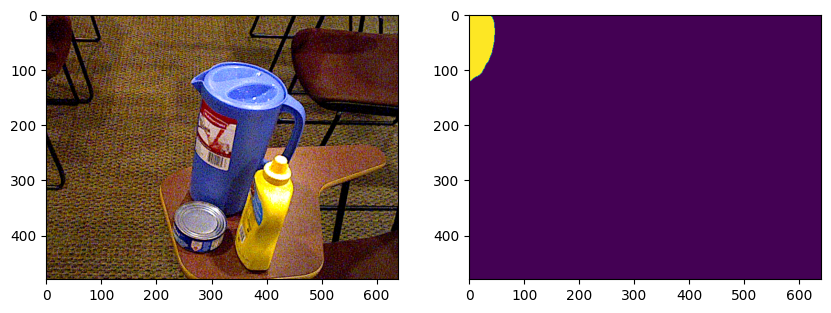

In [120]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,20))
ax[0].imshow(image)
ax[1].imshow(proposals[1])

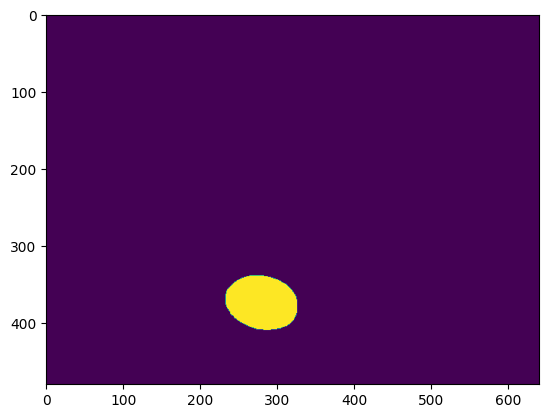

In [12]:
plt.imshow(masks[484])

In [97]:
proposals[600].sum()

8

In [7]:
 def masks_to_boxes(masks: torch.Tensor) -> torch.Tensor:
        """
        Compute the bounding boxes around the provided masks.

        Returns a [N, 4] tensor containing bounding boxes. The boxes are in ``(x1, y1, x2, y2)`` format with
        ``0 <= x1 < x2`` and ``0 <= y1 < y2``.

        Args:
            masks (Tensor[N, H, W]): masks to transform where N is the number of masks
                and (H, W) are the spatial dimensions.

        Returns:
            Tensor[N, 4]: bounding boxes
        """
        if masks.numel() == 0:
            return torch.zeros((0, 4), device=masks.device, dtype=torch.float)

        n, h, w = masks.shape

        bounding_boxes = torch.zeros((n, 4), device=masks.device, dtype=torch.float)

        for index, mask in enumerate(masks):
            if (mask==0).all():
                bounding_boxes[index, 0] = w//2 - 2
                bounding_boxes[index, 1] = h//2 - 2
                bounding_boxes[index, 2] = w//2 + 2
                bounding_boxes[index, 3] = h//2 + 2
            else:
                y, x = torch.where(mask != 0)
                bounding_boxes[index, 0] = torch.min(x)
                bounding_boxes[index, 1] = torch.min(y)
                bounding_boxes[index, 2] = torch.max(x)
                bounding_boxes[index, 3] = torch.max(y)

        return bounding_boxes

In [8]:
import torch

In [ ]:
masks_to_boxes(torch.Tensor(masks))

In [ ]:
torch.Tensor(masks).shape

In [8]:
len(masks)

625

In [12]:
bounding_boxes = torch.zeros((len(masks), 4), dtype=torch.float)
for index, mask in enumerate(masks):
    mask = torch.Tensor(mask)
    if (mask==0).all():
        bounding_boxes[index, 0] = w//2 - 2
        bounding_boxes[index, 1] = h//2 - 2
        bounding_boxes[index, 2] = w//2 + 2
        bounding_boxes[index, 3] = h//2 + 2
    else:
        y, x = torch.where(mask != 0)
        bounding_boxes[index, 0] = torch.min(x)
        bounding_boxes[index, 1] = torch.min(y)
        bounding_boxes[index, 2] = torch.max(x)
        bounding_boxes[index, 3] = torch.max(y)

In [13]:
bounding_boxes

tensor([[  0.,   0.,  46., 121.],
        [  0.,   0.,  46., 121.],
        [ 43.,   0.,  91.,  43.],
        ...,
        [488., 391., 639., 478.],
        [488., 391., 639., 478.],
        [488., 391., 639., 478.]])

In [15]:
mask.shape

torch.Size([480, 640])